In [39]:
"""
Adam Klimczak, 266696

Voice Recognition
This project shows simple voice recognition system based on MFCC (Mel Frequency Cepstral Coefficient) and 
DTW (Dynamic Time Wrapping). To run on the project, the libraries needed are listed below:

matplotlib,
librosa,
numpy,
dtw.

"""


file1 = "266696_23_M_13_2"
file2 = "266696_23_M_21_4"

def read_signals(file1, file2) :
    with open(file1 + '.txt') as f:
        words1 = [l.replace('\n', '') for l in f.readlines()]
        labels = [l[l.replace('\t', 'XX', 1).find('\t'):] for l in words1]
        words1 = [l.split('\t') for l in words1]
    
    with open(file2 + '.txt') as f:
        words2 = [l.replace('\n', '') for l in f.readlines()]
        words2 = [l.split('\t') for l in words2]
        
    return words1, words2, labels
    
words1, words2, labels = read_signals(file1, file2)
print(labels)

['ZAPAL', 'SWIATLO', 'W', 'KUCHNI', 'OTWORZ', 'DRZWI', 'DO', 'GARAZU', 'WLACZ', 'ZMYWARKE', 'WYLACZ', 'TELEWIZOR', 'PODNIES', 'ROLETY', 'W', 'SYPIALNI', 'ZAMKNIJ', 'BRAME', 'ZWIEKSZ', 'OGRZEWANIE', 'O', 'JEDEN', 'STOPIEN', 'ZAKREC', 'WODE', 'W', 'LAZIENCE', 'USTAW', 'ALARM', 'PRZYCISZ', 'RADIO', 'ZMIEN', 'KANAL', 'PODLEJ', 'KWIATKI', 'ZAPARZ', 'KAWE', 'WYLACZ', 'ALARM', 'W', 'GARAZU', 'ZAGOTUJ', 'WODE']


In [40]:
"Calculate MFCC"


import  librosa
import  librosa.display
from dtw import dtw
import numpy as np
import matplotlib.pyplot as plt

mfccs1 = []
mfccs2 = []
words_number = 13

#  load an audio file as waveform as `y`, store the sampling rate as `sr` and compute MFCC
#  (Mel-frequency cepstral coefficients) features from the raw signal

def calculate_mfcc(file1, file2, length) :
    for i in range(length) :
        y1, sr1 = librosa.load(file1 + '.wav', 44100, True, float(words1[i][0]), float(words1[i][1]) - float(words1[i][0]))
        mfccs1.append(librosa.feature.mfcc(y1, sr1))
        y2, sr2 = librosa.load(file2 + '.wav', 44100, True, float(words2[i][0]), float(words2[i][1]) - float(words2[i][0]))
        mfccs2.append(librosa.feature.mfcc(y2, sr2))
        
    return mfccs1, mfccs2

mfccs1, mfccs2 = calculate_mfcc(file1, file2, words_number)

E:\Users\Adam_K\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


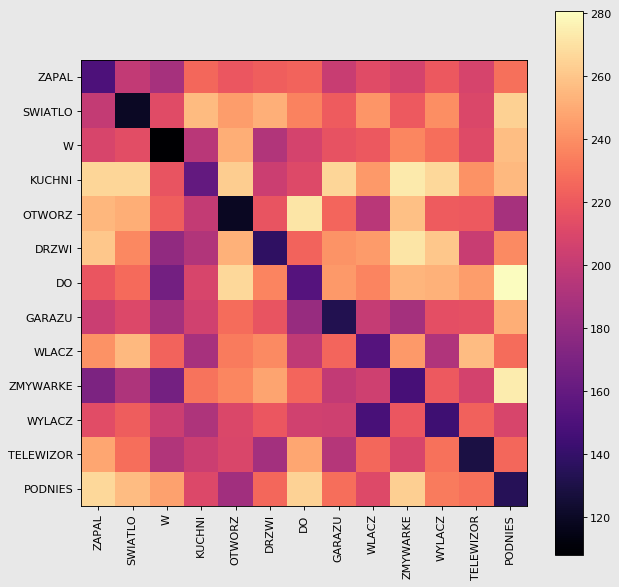

In [29]:
"Comparision signals using DTW"

def matrix(mfccs1, mfccs2, labels, words_number):
    result_dist = np.ndarray(shape = (len(mfccs1), len(mfccs1)))
    for i in range(len(mfccs1)):
        for j in range(len(mfccs2)):
            dist, cost, acc_cost, path = dtw(mfccs1[i].T, mfccs2[j].T, dist=lambda x, y: np.linalg.norm(x - y, ord=1))
            result_dist[i][j] = dist

    plt.figure(figsize=(9,9), dpi= 80, facecolor='#E8E8E8', edgecolor='k')
    plt.imshow(result_dist, interpolation='none', cmap='magma')
    plt.tick_params(axis='both', bottom='on', top='off', labelbottom='on', labeltop='off')
    plt.xticks(range(len(result_dist)), labels, rotation='vertical')
    plt.yticks(range(len(result_dist)), labels)
    plt.colorbar()
    plt.show()
matrix(mfccs1, mfccs2, labels, words_number)

In [41]:
"Calculate classification accuracy for the same person"

def estimate_accuracy(features1, features2):
    correct = 0
    for i in range(words_number) :
        dist, cost, acc_cost, path = dtw(features1[i].T, features2[0].T, dist=lambda x, y: np.linalg.norm(x - y, ord=1))
        minimum = dist;
        min_idx = 0;
        for j in range(1, words_number-1) :
            dist, cost, acc_cost, path = dtw(features1[i].T, features2[j].T, dist=lambda x, y: np.linalg.norm(x - y, ord=1))
            if minimum > dist :
                minimum = dist
                min_idx = j
        if(words1[i][2] == words1[min_idx][2]) :
            correct = correct + 1
        print(words1[i][2] + " ---> " + words2[min_idx][2])
        
    print("Classification accuracy: " + str((correct/words_number)*100) + "%")
    
estimate_accuracy(mfccs1, mfccs2)

ZAPAL ---> ZAPAL
SWIATLO ---> SWIATLO
W ---> W
KUCHNI ---> KUCHNI
OTWORZ ---> OTWORZ
DRZWI ---> DRZWI
DO ---> DO
GARAZU ---> GARAZU
WLACZ ---> WLACZ
ZMYWARKE ---> ZMYWARKE
WYLACZ ---> WYLACZ
TELEWIZOR ---> TELEWIZOR
PODNIES ---> OTWORZ
Classification accuracy: 92.3076923076923%


E:\Users\Adam_K\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


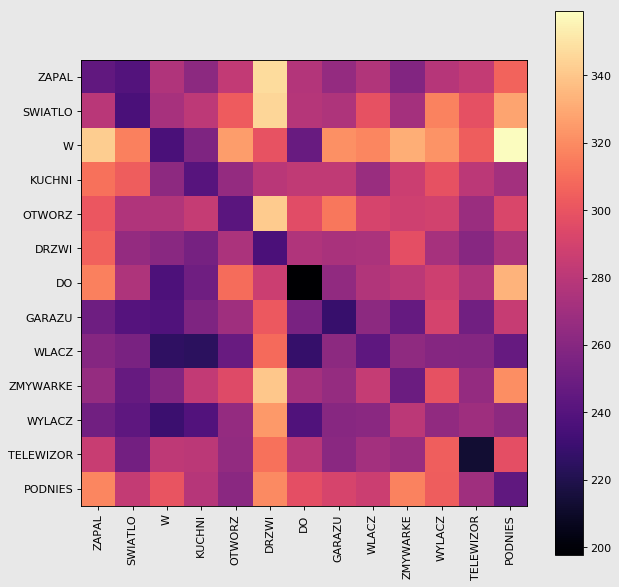

ZAPAL ---> SWIATLO
SWIATLO ---> SWIATLO
W ---> W
KUCHNI ---> KUCHNI
OTWORZ ---> OTWORZ
DRZWI ---> DRZWI
DO ---> DO
GARAZU ---> GARAZU
WLACZ ---> KUCHNI
ZMYWARKE ---> SWIATLO
WYLACZ ---> W
TELEWIZOR ---> TELEWIZOR
PODNIES ---> OTWORZ
Classification accuracy: 61.53846153846154%


In [42]:
"Calculate classification accuracy for the signals from the different people"

file2 = "266696_23_M_17_3"
file1 = "266689_23_K_12_2"
words1 = []
words2 = []
labels = []
mfccs1 = []
mfccs2 = []

words1, words2, labels = read_signals(file1, file2)
mfccs1, mfccs2 = calculate_mfcc(file1, file2, words_number)
matrix(mfccs1, mfccs2, labels, words_number)
estimate_accuracy(mfccs1, mfccs2)

E:\Users\Adam_K\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


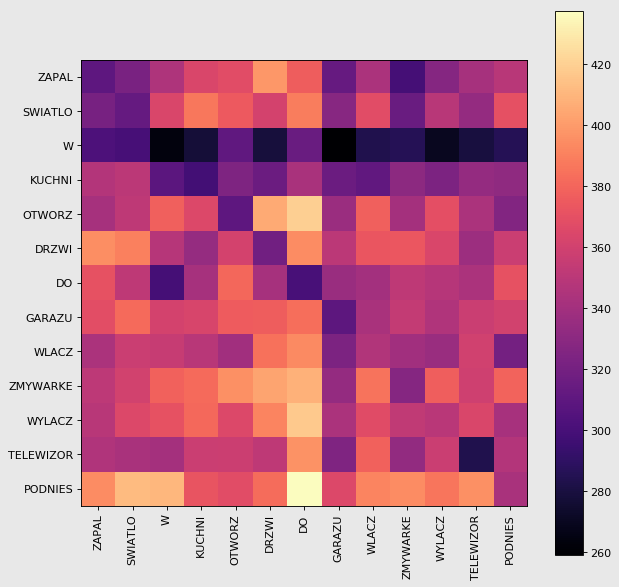

ZAPAL ---> ZMYWARKE
SWIATLO ---> SWIATLO
W ---> GARAZU
KUCHNI ---> KUCHNI
OTWORZ ---> OTWORZ
DRZWI ---> DRZWI
DO ---> W
GARAZU ---> GARAZU
WLACZ ---> GARAZU
ZMYWARKE ---> ZMYWARKE
WYLACZ ---> GARAZU
TELEWIZOR ---> TELEWIZOR
PODNIES ---> GARAZU
Classification accuracy: 53.84615384615385%


In [43]:
"Calculate classification accuracy for the signals from the different people"

file1 = "266696_23_M_21_4"
file2 = "273083_23_M_17_3"
words1 = []
words2 = []
labels = []
mfccs1 = []
mfccs2 = []

words1, words2, labels = read_signals(file1, file2)
mfccs1, mfccs2 = calculate_mfcc(file1, file2, words_number)
matrix(mfccs1, mfccs2, labels, words_number)
estimate_accuracy(mfccs1, mfccs2)

E:\Users\Adam_K\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


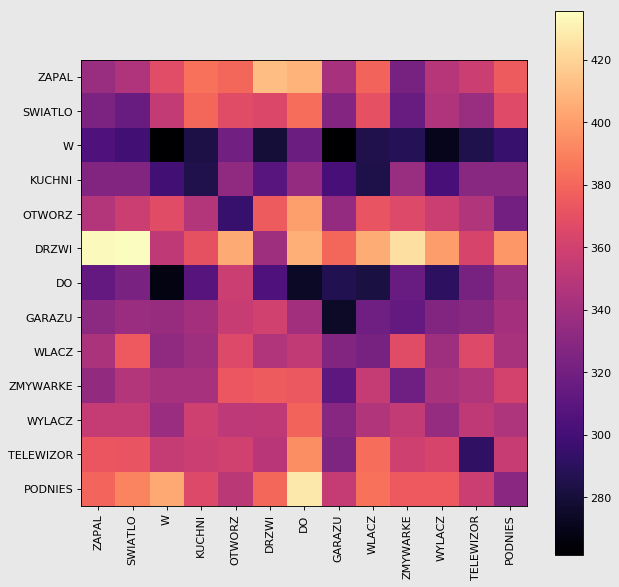

ZAPAL ---> ZMYWARKE
SWIATLO ---> SWIATLO
W ---> GARAZU
KUCHNI ---> WLACZ
OTWORZ ---> OTWORZ
DRZWI ---> DRZWI
DO ---> W
GARAZU ---> GARAZU
WLACZ ---> WLACZ
ZMYWARKE ---> GARAZU
WYLACZ ---> GARAZU
TELEWIZOR ---> TELEWIZOR
PODNIES ---> OTWORZ
Classification accuracy: 46.15384615384615%


In [44]:
"Calculate classification accuracy for the signals from the different people in the same part of a day"

file1 = "266696_23_M_17_3"
file2 = "273083_23_M_17_3"
words1 = []
words2 = []
labels = []
mfccs1 = []
mfccs2 = []

words1, words2, labels = read_signals(file1, file2)
mfccs1, mfccs2 = calculate_mfcc(file1, file2, words_number)
matrix(mfccs1, mfccs2, labels, words_number)
estimate_accuracy(mfccs1, mfccs2)